In [30]:
using JLD2, FileIO, Printf, Statistics

using Plots
pyplot()

Plots.PyPlotBackend()

In [5]:
@load "table5.jld2" ans_arr time_arr real_arr h_size_arr iters

5-element Array{Symbol,1}:
 :ans_arr   
 :time_arr  
 :real_arr  
 :h_size_arr
 :iters     

In [6]:
iters = 20
# ns = [512, 1024, 2048]
ns = [4^2, 8^2, 16^2]
m = 8
βs = [0.3, 0.1, 0.03];

In [8]:
time_arr ./= iters

3×3×5 Array{Float64,3}:
[:, :, 1] =
 0.0860361  0.0136876  0.01386  
 0.0718942  0.0717448  0.0728992
 0.74456    0.737566   0.747257 

[:, :, 2] =
 0.205387  0.116117  0.116098
 0.42194   0.420798  0.430695
 1.50917   1.50621   1.50684 

[:, :, 3] =
 0.0460682   0.00044999  0.000437268
 0.00260302  0.00250161  0.00220746 
 0.0131486   0.0147834   0.0124648  

[:, :, 4] =
 0.0380649  0.0375246  0.0376697
 0.138344   0.13912    0.141816 
 0.520721   0.519108   0.516926 

[:, :, 5] =
 0.080032  0.0789472  0.078152
 0.277047  0.277489   0.280192
 1.02932   1.0326     1.0226  

In [9]:
time_arr[1,:,:]

3×5 Array{Float64,2}:
 0.0860361  0.205387  0.0460682    0.0380649  0.080032 
 0.0136876  0.116117  0.00044999   0.0375246  0.0789472
 0.01386    0.116098  0.000437268  0.0376697  0.078152 

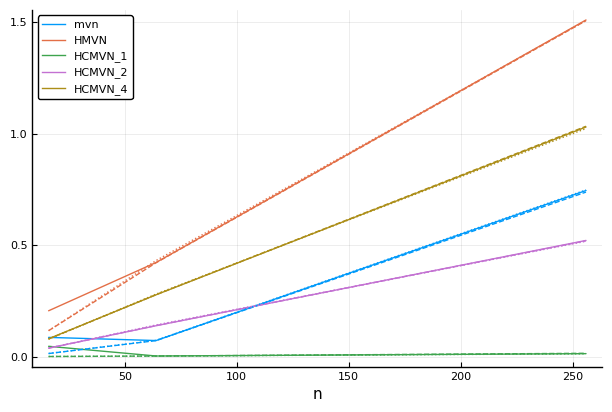

In [27]:
# beta = beta1
plot1 = Plots.plot(ns, time_arr[:,1,1], label = "mvn", linecolor = 1, xlab = "n")
Plots.plot!(plot1, ns, time_arr[:,1,2], label = "HMVN", linecolor = 2)
Plots.plot!(plot1, ns, time_arr[:,1,3], label = "HCMVN_1", linecolor = 3)
Plots.plot!(plot1, ns, time_arr[:,1,4], label = "HCMVN_2", linecolor = 4)
Plots.plot!(plot1, ns, time_arr[:,1,5], label = "HCMVN_4", linecolor = 5)

Plots.plot!(plot1, ns, time_arr[:,2,1], label = "", linecolor = 1, linestyle = :dash)
Plots.plot!(plot1, ns, time_arr[:,2,2], label = "", linecolor = 2, linestyle = :dash)
Plots.plot!(plot1, ns, time_arr[:,2,3], label = "", linecolor = 3, linestyle = :dash)
Plots.plot!(plot1, ns, time_arr[:,2,4], label = "", linecolor = 4, linestyle = :dash)
Plots.plot!(plot1, ns, time_arr[:,2,5], label = "", linecolor = 5, linestyle = :dash)

Plots.plot!(plot1, ns, time_arr[:,3,1], label = "", linecolor = 1, linestyle = :dot)
Plots.plot!(plot1, ns, time_arr[:,3,2], label = "", linecolor = 2, linestyle = :dot)
Plots.plot!(plot1, ns, time_arr[:,3,3], label = "", linecolor = 3, linestyle = :dot)
Plots.plot!(plot1, ns, time_arr[:,3,4], label = "", linecolor = 4, linestyle = :dot)
Plots.plot!(plot1, ns, time_arr[:,3,5], label = "", linecolor = 5, linestyle = :dot)

savefig("table5_time.pdf")

In [44]:
acc_arr = mapslices(mean, abs.((ans_arr .- real_arr) ./real_arr), dims = [3])[:,:,1,:]

3×3×5 Array{Float64,3}:
[:, :, 1] =
 5.37574e-17  7.90618e-17  9.83407e-17
 6.85717e-17  7.58415e-17  8.00867e-17
 8.79247e-17  9.4761e-17   5.72991e-17

[:, :, 2] =
 5.36778e-5   1.18842e-10  7.62536e-16
 0.000143876  3.0942e-10   1.20349e-15
 0.0002151    4.01357e-10  9.46932e-16

[:, :, 3] =
 0.00213998   8.41339e-7  4.29444e-16
 0.00016726   1.61376e-6  5.09711e-16
 0.000213409  1.78907e-8  5.75027e-16

[:, :, 4] =
 0.00172346   6.00737e-7  1.02642e-15
 0.00016769   8.93266e-8  1.39493e-15
 0.000213409  1.78804e-8  1.16291e-15

[:, :, 5] =
 0.000276372  1.82142e-8  8.70469e-16
 0.000169313  6.86743e-9  1.44738e-15
 0.000213412  1.55875e-8  9.73202e-16

In [47]:
h_arr = mapslices(mean, h_size_arr, dims = [3])

3×3×1 Array{Float64,3}:
[:, :, 1] =
 0.885932  0.885932  0.885932
 0.559834  0.559834  0.419449
 0.277207  0.277207  0.199091

In [62]:
for j in 1:size(acc_arr, 2)
    
    for i in 1:size(acc_arr, 1)
        print(ns[i], " ") 
        @printf("& %.2f", h_arr[i,j])
        print(" ")
        for m in 1:size(acc_arr, 3)
            @printf("& %.2f", 10^6*acc_arr[i,j, m])
            print("ppm ")
        end
        print("\\\\ \n")
    end
end

16 & 0.89 & 0.00ppm & 53.68ppm & 2139.98ppm & 1723.46ppm & 276.37ppm \\ 
64 & 0.56 & 0.00ppm & 143.88ppm & 167.26ppm & 167.69ppm & 169.31ppm \\ 
256 & 0.28 & 0.00ppm & 215.10ppm & 213.41ppm & 213.41ppm & 213.41ppm \\ 
16 & 0.89 & 0.00ppm & 0.00ppm & 0.84ppm & 0.60ppm & 0.02ppm \\ 
64 & 0.56 & 0.00ppm & 0.00ppm & 1.61ppm & 0.09ppm & 0.01ppm \\ 
256 & 0.28 & 0.00ppm & 0.00ppm & 0.02ppm & 0.02ppm & 0.02ppm \\ 
16 & 0.89 & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm \\ 
64 & 0.42 & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm \\ 
256 & 0.20 & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm & 0.00ppm \\ 
